In [1]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import json

In [17]:
scheme = 'AvgKD'
alpha = 0.01
path = 'config/data-heterog-partit/CIFAR10/2 agents'

with open(path + '/' + scheme + '_' + str(alpha) + '.json') as jsonFile:
    config = json.load(jsonFile)
    jsonFile.close()

seed = config['Seed']
dataset = config['Data']['Dataset']
batch_size = config['Data']['Batch_size']
test_batch_size = config['Data']['Eval_batch_size']
# alpha = config['Data']['Alpha']
num_clients = config['Clients']

In [2]:
distill_schemes = ['AKD', 'PKD', 'AvgKD']
baselines = ['FedAvg', 'FedProx', 'FedMA5']

In [3]:
def plot_helper(Log, title='Test_acc', iterations=25, incr=1, client=0):
    k=1
    T_x, T_y = [], []
    # S_x, S_y = [], []
    for i in range(iterations):
        T_x.append(k)
        # S_x.append(k+incr-1)
        if client != None:
            # T_y.append(sum(Log[str(i)][str(client)][title] for client in range(N))/N)
            T_y.append(Log[str(i)][str(client)][title])
        else:
            T_y.append(Log[str(i)][title])
        # S_y.append(Log[str(i)][str(client)][title])
        k+=incr
    return T_x, T_y

In [4]:
def read_Log(path, scheme, alpha, diff=False):
    if alpha != None:
        if diff:
            with open(path +'/'+ scheme + '/' + 'result_'+ str(alpha) + '_Diff.json') as jsonFile:
                Log = json.load(jsonFile)
                jsonFile.close()
        else:
            with open(path +'/'+ scheme + '/' + 'result_'+ str(alpha) + '.json') as jsonFile:
                Log = json.load(jsonFile)
                jsonFile.close()
    else:
        with open(path + '/'+ scheme + '/' + 'result' + '.json') as jsonFile:
            Log = json.load(jsonFile)
            jsonFile.close()
    return Log

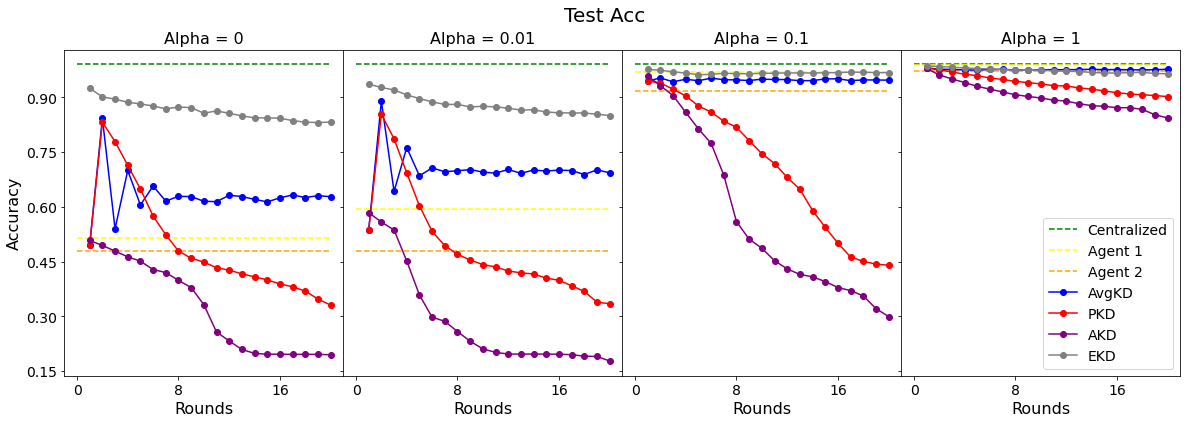

In [5]:
alphas = [0, 0.01, 0.1, 1]
dataset = 'MNIST'
N = 2
# schemes = ['Centralized', 'AvgKD', 'PKD', 'AKD', 'FedAvg', 'EKD']
# c = ['yellow', 'blue', 'red', 'purple', 'brown', 'gray']
schemes = ['Centralized', 'AvgKD', 'PKD', 'AKD', 'EKD']
c = ['yellow', 'blue', 'red', 'purple', 'gray']
path = 'config/data-heterog/' + dataset + '/' + str(N) + ' agents'
num_rounds = 20
one_agent_schemes = ['Centralized', 'EKD']
diff = True
fig, ax = plt.subplots(1, len(alphas), figsize=(20, 6), sharey=True, sharex=True)
fig.suptitle('Test Acc', fontsize=20)
i = 0
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].yaxis.set_major_locator(MaxNLocator(8))
ax[0].xaxis.set_major_locator(MaxNLocator(3))

for alpha in alphas:
    for k, scheme in enumerate(schemes):
        if scheme not in one_agent_schemes:
            Log = read_Log(path, scheme, alpha, diff)
            for j in range(N):
                if j==0:
                    T_x, T_y = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                else:
                    T_x_, T_y_ = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                    T_x, T_y = [T_x[i] + T_x_[i] for i in range(len(T_x_))], [T_y[i] + T_y_[i] for i in range(len(T_y_))]
        else:
            if scheme == 'Centralized':
                Log = read_Log('config/data-heterog/' + dataset, scheme, None)
                l = num_rounds + 1
                ax[i].plot(np.arange(0, l), np.repeat(Log['Test_acc'], l), c='green', linestyle='dashed', label=scheme)
            if scheme == 'EKD':
                Log = read_Log(path, scheme, alpha, diff)
                T_x, T_y = plot_helper(Log, 'Test_acc', 2*num_rounds, 1, None)
                ax[i].plot(T_x[:num_rounds], T_y[::2], color=c[k], label=scheme, marker='o')
        if scheme not in one_agent_schemes:
            if scheme == 'AvgKD':
                colors = ['yellow', 'orange']
                for cl in range(N):
                    l = num_rounds + 1
                    ax[i].plot(np.arange(0, l), np.repeat(Log['0'][str(cl)]['Test_acc'], l), c=colors[cl], linestyle='dashed', label='Agent '+str(cl+1))
            T_x, T_y = [T_x[i]/N for i in range(len(T_x))], [T_y[i]/N for i in range(len(T_y))]
            ax[i].plot(T_x, T_y, color=c[k], label=scheme , marker='o')
    ax[i].set_title('Alpha = ' + str(alpha), fontsize=16)
    ax[i].set_xlabel('Rounds', fontsize=16)
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    i+=1

ax[len(alphas)-1].legend(loc="lower right", prop={'size': 14})
fig.subplots_adjust(wspace=0)
if diff==False:
    pdf_path =  dataset + '_' + str(N) + ' agents'
else:
    pdf_path =  dataset + '_' + str(N) + ' agents_Diff'
plt.savefig(pdf_path+'.pdf')

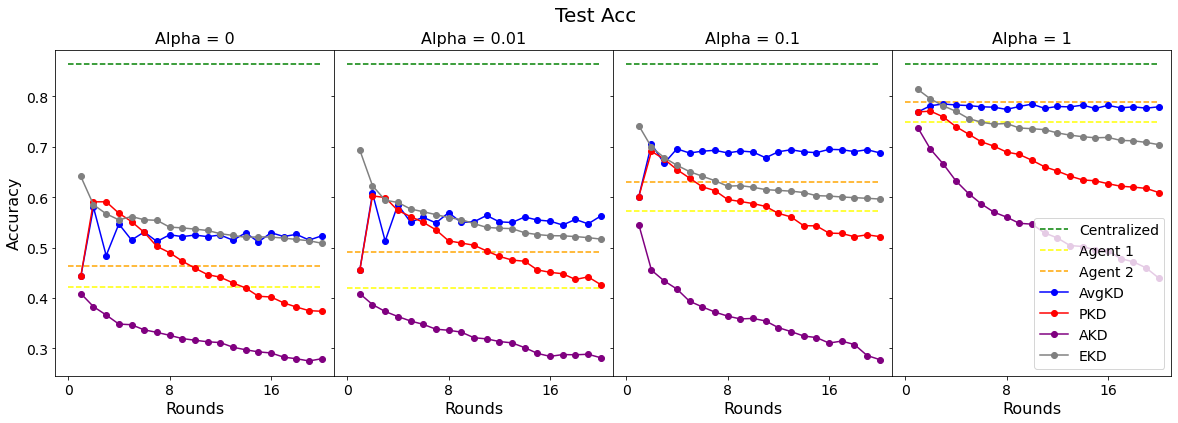

In [27]:
alphas = [0, 0.01, 0.1, 1]
dataset = 'CIFAR10'
N = 2
# schemes = ['Centralized', 'AvgKD', 'PKD', 'AKD', 'FedAvg', 'EKD']
# c = ['yellow', 'blue', 'red', 'purple', 'brown', 'gray', 'black']
schemes = ['Centralized', 'AvgKD', 'PKD', 'AKD', 'EKD']
c = ['yellow', 'blue', 'red', 'purple', 'gray', 'black']
path = 'config/data-heterog/' + dataset + '/' + str(N) + ' agents'
num_rounds = 20
one_agent_schemes = ['Centralized', 'EKD']
diff = True

fig, ax = plt.subplots(1, len(alphas), figsize=(20, 6), sharey=True, sharex=True)
fig.suptitle('Test Acc', fontsize=20)
i = 0
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].yaxis.set_major_locator(MaxNLocator(8))
ax[0].xaxis.set_major_locator(MaxNLocator(3))

for alpha in alphas:
    for k, scheme in enumerate(schemes):
        if scheme not in one_agent_schemes:
            Log = read_Log(path, scheme, alpha, diff)
            for j in range(N):
                if j==0:
                    T_x, T_y = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                else:
                    T_x_, T_y_ = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                    T_x, T_y = [T_x[i] + T_x_[i] for i in range(len(T_x_))], [T_y[i] + T_y_[i] for i in range(len(T_y_))]
        else:
            if scheme == 'Centralized':
                Log = read_Log('config/data-heterog/' + dataset, scheme, None)
                l = num_rounds + 1
                ax[i].plot(np.arange(0, l), np.repeat(Log['Test_acc'], l), c='green', linestyle='dashed', label=scheme)
            if scheme == 'EKD':
                Log = read_Log(path, 'EKD', alpha, diff)
                T_x, T_y = plot_helper(Log, 'Test_acc', 2*num_rounds, 1, None)
                ax[i].plot(T_x[:num_rounds], T_y[::2], color=c[k], label=scheme, marker='o')
        if scheme not in one_agent_schemes:
            if scheme == 'AvgKD':
                colors = ['yellow', 'orange']
                for cl in range(N):
                    l = num_rounds + 1
                    ax[i].plot(np.arange(0, l), np.repeat(Log['0'][str(cl)]['Test_acc'], l), c=colors[cl], linestyle='dashed', label='Agent '+str(cl+1))
            T_x, T_y = [T_x[i]/N for i in range(len(T_x))], [T_y[i]/N for i in range(len(T_y))]
            ax[i].plot(T_x, T_y, color=c[k], label=scheme , marker='o')
    ax[i].set_title('Alpha = ' + str(alpha), fontsize=16)
    ax[i].set_xlabel('Rounds', fontsize=16)
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    i+=1

ax[len(alphas)-1].legend(loc="lower right", prop={'size': 14})
fig.subplots_adjust(wspace=0)
if diff==False:
    pdf_path =  dataset + '_' + str(N) + ' agents'
else:
    pdf_path =  dataset + '_' + str(N) + ' agents_Diff'
plt.savefig(pdf_path+'.pdf')

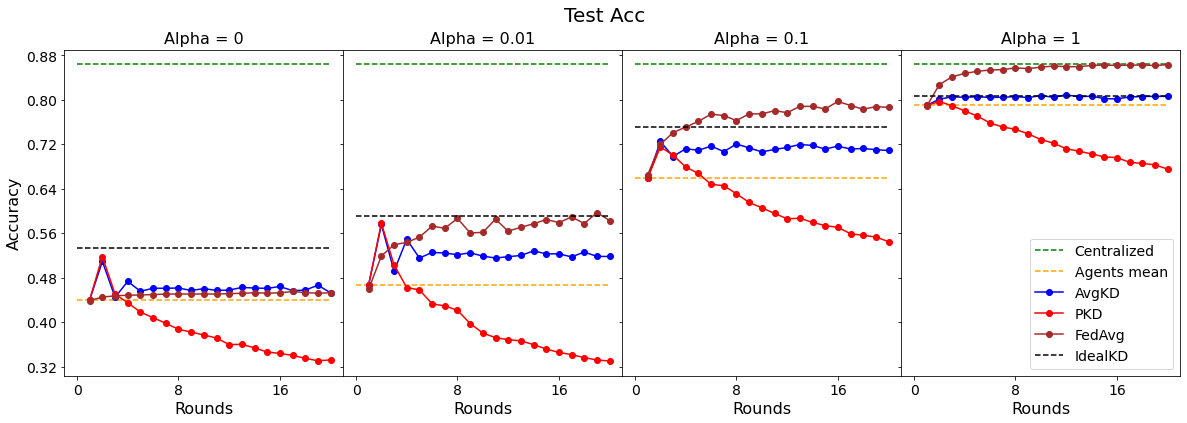

In [11]:
alphas = [0, 0.01, 0.1, 1]
dataset = 'CIFAR10'
N = 2
schemes = ['Centralized', 'AvgKD', 'PKD', 'FedAvg', 'IdealKD']
c = ['yellow', 'blue', 'red', 'brown', 'black']
path = 'config/data-heterog-partit/' + dataset + '/' + str(N) + ' agents'
num_rounds = 20
dashed = ['Centralized', 'IdealKD']
diff = False

fig, ax = plt.subplots(1, len(alphas), figsize=(20, 6), sharey=True, sharex=True)
fig.suptitle('Test Acc', fontsize=20)
i = 0
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].yaxis.set_major_locator(MaxNLocator(8))
ax[0].xaxis.set_major_locator(MaxNLocator(3))

for alpha in alphas:
    for k, scheme in enumerate(schemes):
        if scheme not in dashed:
            Log = read_Log(path, scheme, alpha, diff)
            for j in range(N):
                if j==0:
                    T_x, T_y = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                else:
                    T_x_, T_y_ = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                    T_x, T_y = [T_x[i] + T_x_[i] for i in range(len(T_x_))], [T_y[i] + T_y_[i] for i in range(len(T_y_))]
        else:
            if scheme == 'Centralized':
                Log = read_Log('config/data-heterog/' + dataset, scheme, None)
                l = num_rounds + 1
                ax[i].plot(np.arange(0, l), np.repeat(Log['Test_acc'], l), c='green', linestyle='dashed', label=scheme)
            if scheme == 'IdealKD':
                Log = read_Log(path, scheme, alpha, diff)
                l = num_rounds + 1
                val = (Log['0']['Test_acc'] + Log['1']['Test_acc']) / 2
                ax[i].plot(np.arange(0, l), np.repeat(val, l), c='black', linestyle='dashed', label=scheme)
                # ax[i].plot(np.arange(0, l), np.repeat(Log['1']['Test_acc'], l), c='blue', linestyle='dashed', label=scheme + ' Agent 2')
            if scheme == 'IdealKD_PKD':
                with open(path +'/'+ 'IdealKD' + '/' + 'result_'+ str(alpha) + 'PKD.json') as jsonFile:
                    Log = json.load(jsonFile)
                    jsonFile.close()
                l = num_rounds + 1
                ax[i].plot(np.arange(0, l), np.repeat(Log['0']['Test_acc'], l), c='black', linestyle='dashed', label=scheme + ' Agent 1')
                ax[i].plot(np.arange(0, l), np.repeat(Log['1']['Test_acc'], l), c='grey', linestyle='dashed', label=scheme + ' Agent 2')
        if scheme not in dashed:
            if scheme == 'AvgKD':
                # colors = ['yellow', 'orange']
                # for cl in range(N):
                #     l = num_rounds + 1
                #     ax[i].plot(np.arange(0, l), np.repeat(Log['0'][str(cl)]['Test_acc'], l), c=colors[cl], linestyle='dashed', label='Agent '+str(cl+1))
                val = sum(Log['0'][str(cl)]['Test_acc'] for cl in range(N)) / N
                ax[i].plot(np.arange(0, l), np.repeat(val, l), c='orange', linestyle='dashed', label='Agents mean')
            T_x, T_y = [T_x[i]/N for i in range(len(T_x))], [T_y[i]/N for i in range(len(T_y))]
            ax[i].plot(T_x, T_y, color=c[k], label=scheme , marker='o')
    ax[i].set_title('Alpha = ' + str(alpha), fontsize=16)
    ax[i].set_xlabel('Rounds', fontsize=16)
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    i+=1

ax[len(alphas)-1].legend(loc="lower right", prop={'size': 14})
fig.subplots_adjust(wspace=0)

if diff==False:
    pdf_path =  dataset + '_' + str(N) + ' agents_7-3'
else:
    pdf_path =  dataset + '_' + str(N) + ' agents_Diff_7-3'
plt.savefig(pdf_path+'.pdf')

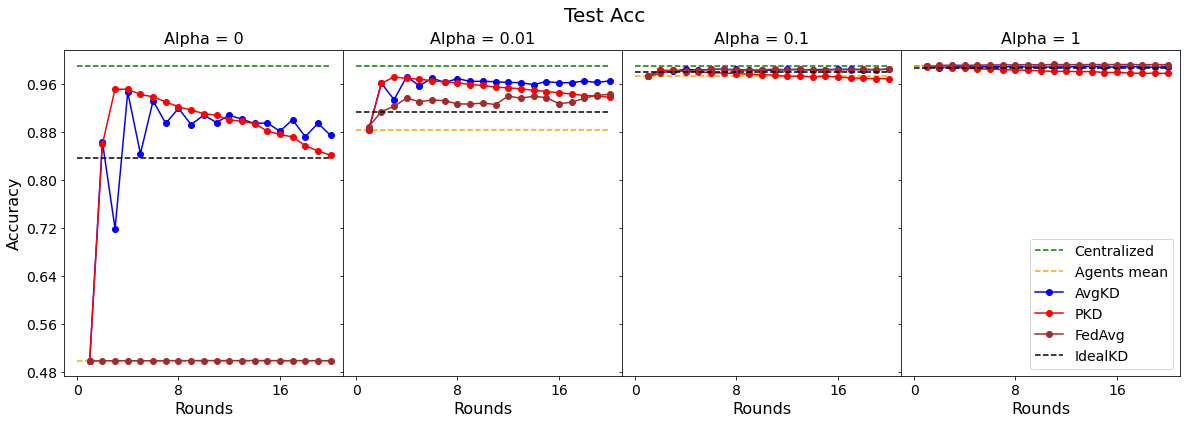

In [12]:
alphas = [0, 0.01, 0.1, 1]
dataset = 'MNIST'
N = 2
schemes = ['Centralized', 'AvgKD', 'PKD', 'FedAvg', 'IdealKD']
c = ['yellow', 'blue', 'red', 'brown', 'black']
path = 'config/data-heterog-partit/' + dataset + '/' + str(N) + ' agents'
num_rounds = 20
dashed = ['Centralized', 'IdealKD']
diff = False

fig, ax = plt.subplots(1, len(alphas), figsize=(20, 6), sharey=True, sharex=True)
fig.suptitle('Test Acc', fontsize=20)
i = 0
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].yaxis.set_major_locator(MaxNLocator(8))
ax[0].xaxis.set_major_locator(MaxNLocator(3))

for alpha in alphas:
    for k, scheme in enumerate(schemes):
        if scheme not in dashed:
            Log = read_Log(path, scheme, alpha, diff)
            for j in range(N):
                if j==0:
                    T_x, T_y = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                else:
                    T_x_, T_y_ = plot_helper(Log, 'Test_acc', num_rounds, 1, j)
                    T_x, T_y = [T_x[i] + T_x_[i] for i in range(len(T_x_))], [T_y[i] + T_y_[i] for i in range(len(T_y_))]
        else:
            if scheme == 'Centralized':
                Log = read_Log('config/data-heterog/' + dataset, scheme, None)
                l = num_rounds + 1
                ax[i].plot(np.arange(0, l), np.repeat(Log['Test_acc'], l), c='green', linestyle='dashed', label=scheme)
            if scheme == 'IdealKD':
                Log = read_Log(path, scheme, alpha, diff)
                l = num_rounds + 1
                val = (Log['0']['Test_acc'] + Log['1']['Test_acc']) / 2
                ax[i].plot(np.arange(0, l), np.repeat(val, l), c='black', linestyle='dashed', label=scheme)
                # ax[i].plot(np.arange(0, l), np.repeat(Log['1']['Test_acc'], l), c='blue', linestyle='dashed', label=scheme + ' Agent 2')
            if scheme == 'IdealKD_PKD':
                with open(path +'/'+ 'IdealKD' + '/' + 'result_'+ str(alpha) + 'PKD.json') as jsonFile:
                    Log = json.load(jsonFile)
                    jsonFile.close()
                l = num_rounds + 1
                ax[i].plot(np.arange(0, l), np.repeat(Log['0']['Test_acc'], l), c='black', linestyle='dashed', label=scheme + ' Agent 1')
                ax[i].plot(np.arange(0, l), np.repeat(Log['1']['Test_acc'], l), c='grey', linestyle='dashed', label=scheme + ' Agent 2')
        if scheme not in dashed:
            if scheme == 'AvgKD':
                
                # colors = ['yellow', 'orange']
                # for cl in range(N):
                #     l = num_rounds + 1
                #     ax[i].plot(np.arange(0, l), np.repeat(Log['0'][str(cl)]['Test_acc'], l), c=colors[cl], linestyle='dashed', label='Agent '+str(cl+1))
                val = sum(Log['0'][str(cl)]['Test_acc'] for cl in range(N)) / N
                ax[i].plot(np.arange(0, l), np.repeat(val, l), c='orange', linestyle='dashed', label='Agents mean')
            T_x, T_y = [T_x[i]/N for i in range(len(T_x))], [T_y[i]/N for i in range(len(T_y))]
            ax[i].plot(T_x, T_y, color=c[k], label=scheme , marker='o')
    ax[i].set_title('Alpha = ' + str(alpha), fontsize=16)
    ax[i].set_xlabel('Rounds', fontsize=16)
    ax[i].tick_params(axis='both', which='major', labelsize=14)
    i+=1

ax[len(alphas)-1].legend(loc="lower right", prop={'size': 14})
fig.subplots_adjust(wspace=0)

if diff==False:
    pdf_path =  dataset + '_' + str(N) + ' agents_7-3'
else:
    pdf_path =  dataset + '_' + str(N) + ' agents_Diff_7-3'
plt.savefig(pdf_path+'.pdf')